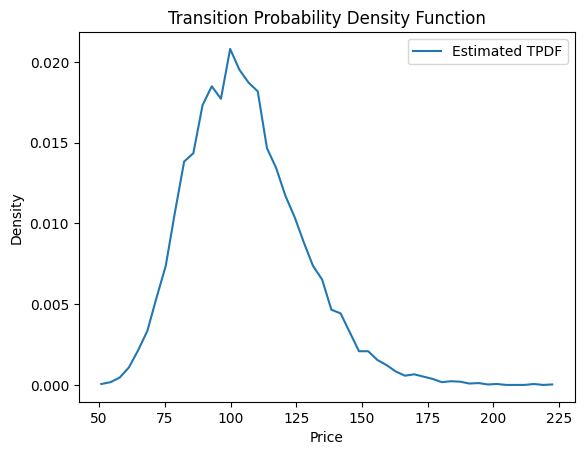

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for a Geometric Brownian Motion
mu = 0.05  # Drift
sigma = 0.2  # Volatility
S0 = 100  # Initial price
T = 1.0  # Time horizon
dt = 0.01  # Time step
n_simulations = 10000  # Number of simulations

# Simulate paths
n_steps = int(T / dt)
paths = np.zeros((n_simulations, n_steps + 1))
paths[:, 0] = S0

for t in range(1, n_steps + 1):
    z = np.random.normal(0, 1, n_simulations)
    paths[:, t] = paths[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Estimate TPDF at final time
final_prices = paths[:, -1]
pdf, bins = np.histogram(final_prices, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the TPDF
plt.plot(bin_centers, pdf, label="Estimated TPDF")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Transition Probability Density Function")
plt.legend()
plt.show()